In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv('/content/Google_Stock_Price_Train.xls')
test = pd.read_csv('/content/Google_Stock_Price_Test.xls')

In [10]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
train.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
test.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

train['Close'] = train['Close'].str.replace(',', '').astype(float)

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1258.0,712.669666,164.752591,491.2,576.74,695.675,782.105,1216.83


,count,mean,std,min,25%,50%,75%,max
Close,1258.0,712.669666,164.752591,491.2,576.74,695.675,782.105,1216.83


In [13]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,20.0,807.9045,13.210088,786.14,802.2825,806.11,810.76,835.67


,count,mean,std,min,25%,50%,75%,max
Close,20.0,807.9045,13.210088,786.14,802.2825,806.11,810.76,835.67


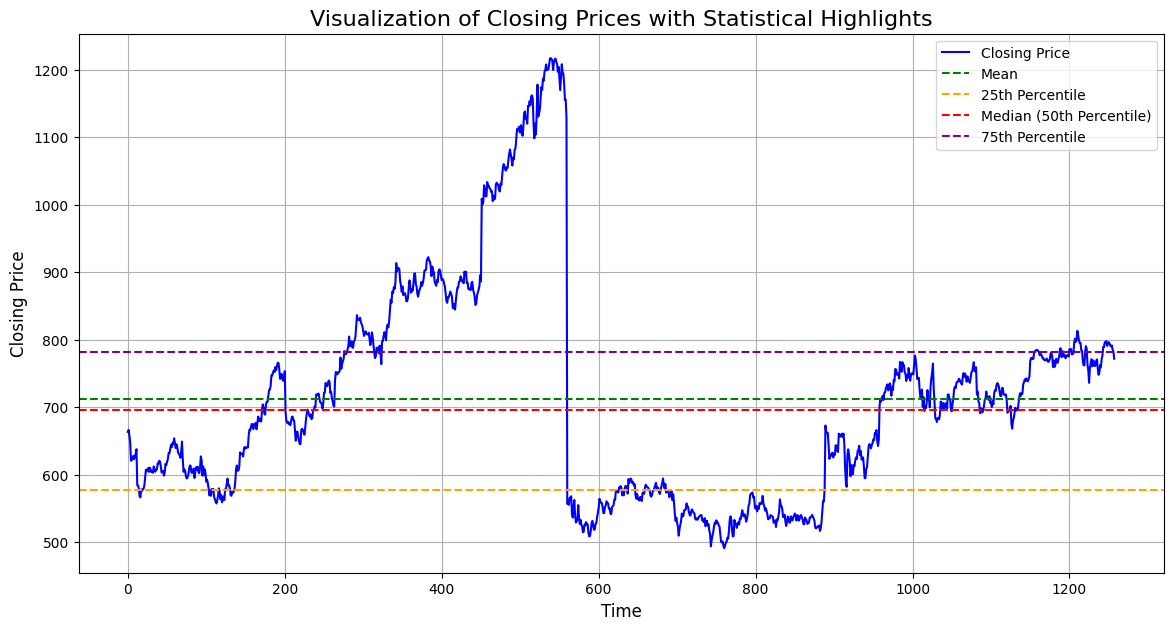

In [14]:
train_close = train['Close']
# Plotting the line plot
plt.figure(figsize=(14, 7))
plt.plot(train_close, color='blue', label='Closing Price')
# Adding statistical highlights
plt.axhline(np.mean(train_close), color='green', linestyle='--', linewidth=1.5, label='Mean')
plt.axhline(np.percentile(train_close, 25), color='orange', linestyle='--', linewidth=1.5, label='25th Percentile')
plt.axhline(np.median(train_close), color='red', linestyle='--', linewidth=1.5, label='Median (50th Percentile)')
plt.axhline(np.percentile(train_close, 75), color='purple', linestyle='--', linewidth=1.5, label='75th Percentile')
# Adding chart elements
plt.title("Visualization of Closing Prices with Statistical Highlights", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


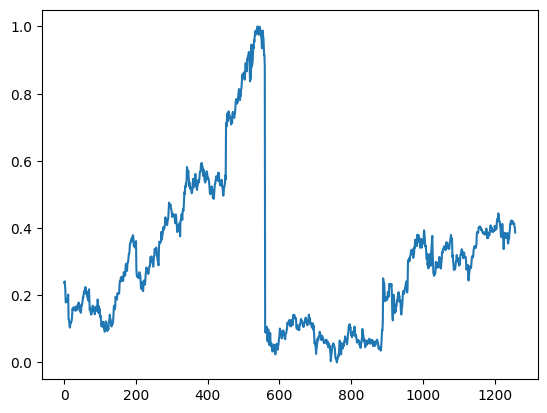

In [15]:
train['Date'] = pd.to_datetime(train['Date'])
numerical_features = train[['Close']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(numerical_features)
train_scaled_df = pd.DataFrame(train_scaled, columns=['Close'], index=train.index)
plt.plot(train_scaled_df)
plt.show()

In [16]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split

# Define the splitting ratio
split_ratio = 0.8  # 80% training, 20% validation

# Calculate the split index
split_index = int(len(train_scaled_df) * split_ratio)

# Split the data
train_data = train_scaled_df.iloc[:split_index]  # First 80% for training
val_data = train_scaled_df.iloc[split_index:]   # Last 20% for validation

# Prepare X_train, X_val, y_train, y_val
timesteps = 50

# Training data
X_train, y_train = [], []
for i in range(timesteps, len(train_data)):
    X_train.append(train_data['Close'].iloc[i-timesteps:i].values)
    y_train.append(train_data['Close'].iloc[i])

# Validation data
X_val, y_val = [], []
for i in range(timesteps, len(val_data)):
    X_val.append(val_data['Close'].iloc[i-timesteps:i].values)
    y_val.append(val_data['Close'].iloc[i])

# Convert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)

# Reshape X_train and X_val for LSTM input (add feature dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (956, 50, 1)
Shape of y_train: (956,)
Shape of X_val: (202, 50, 1)
Shape of y_val: (202,)


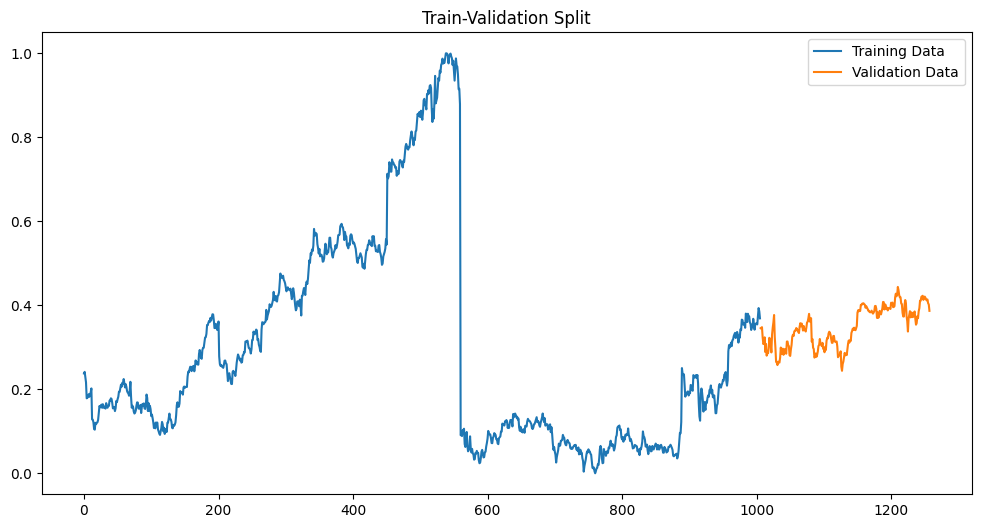

In [17]:
# Plot the training and validation sets
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(val_data.index, val_data['Close'], label='Validation Data')
plt.legend()
plt.title('Train-Validation Split')
plt.show()


<a id="4"></a>
### RNN


In [24]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting

# Initialising the RNN
regressor = Sequential()

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.4911 - val_loss: 0.0017
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.2449 - val_loss: 0.0321
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1668 - val_loss: 0.0204
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1261 - val_loss: 0.0014
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0940 - val_loss: 0.0110
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0997 - val_loss: 0.0018
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0694 - val_loss: 7.1682e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0595 - val_loss: 0.0043
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0464 - val_loss: 0.0025
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0452 - val_loss: 0.0029
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0418 - val_loss: 0.0098
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/

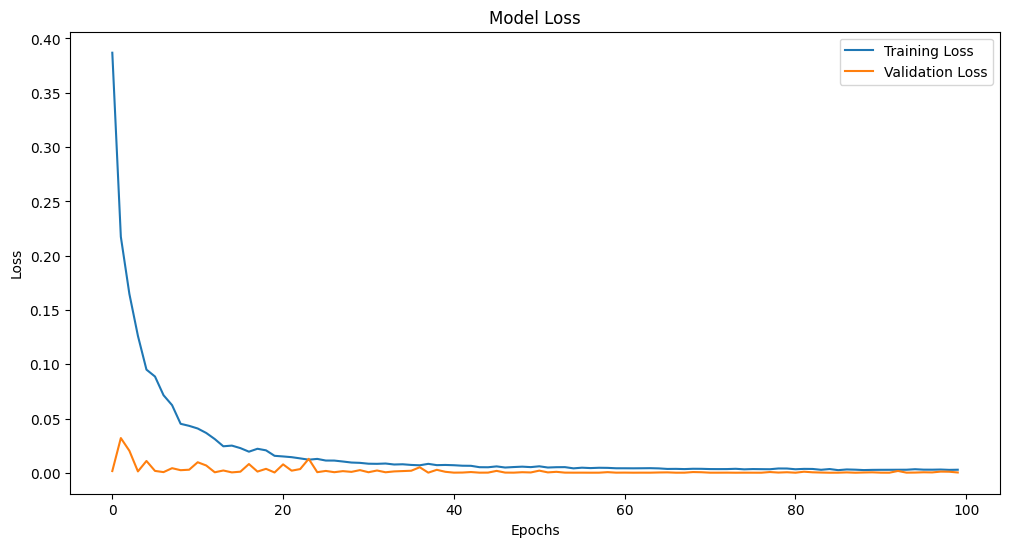

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [32]:
# Evaluate on validation data
val_loss = regressor.evaluate(X_val, y_val)  # Assign to a single variable
print(f"Validation Loss: {val_loss}")

# If you want to calculate MAE separately, you can use sklearn.metrics:
from sklearn.metrics import mean_absolute_error
y_pred = regressor.predict(X_val)
val_mae = mean_absolute_error(y_val, y_pred)
print(f"Validation MAE: {val_mae}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.7403e-04
Validation Loss: 0.0003756808000616729
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Validation MAE: 0.01608184570666816


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


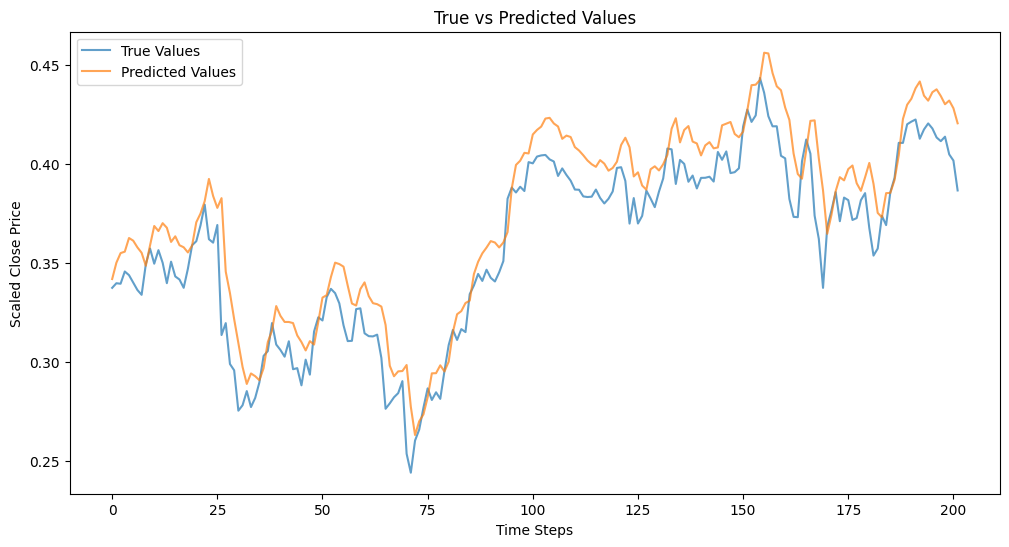

In [34]:
# Predict on validation data
y_pred = regressor.predict(X_val)

# Plot true vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='True Values', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


<a id="5"></a>
### Visualization of RNN


<a id="6"></a>
### LSTM

In [35]:
# ------ LSTM --------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [36]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


956/956 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0148
Epoch 2/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0031
Epoch 3/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0021
Epoch 4/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0047
Epoch 5/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0017
Epoch 6/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0017
Epoch 7/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0011
Epoch 8/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 8.0776e-04
Epoch 9/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0014
Epoch 10/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 4.5976e-04
Epoch 11/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 4.9413e-04
Epoch 12/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0016
Epoch 13/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0024
Epoch 14/50
956/956 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 8.1213e-04
Epoch 15/50
956/956 ━━━━━━

In [37]:
predicted_data2=model.predict(X_val)
predicted_data2=scaler.inverse_transform(predicted_data2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


<a id="7"></a>
### Visualization of LSTM

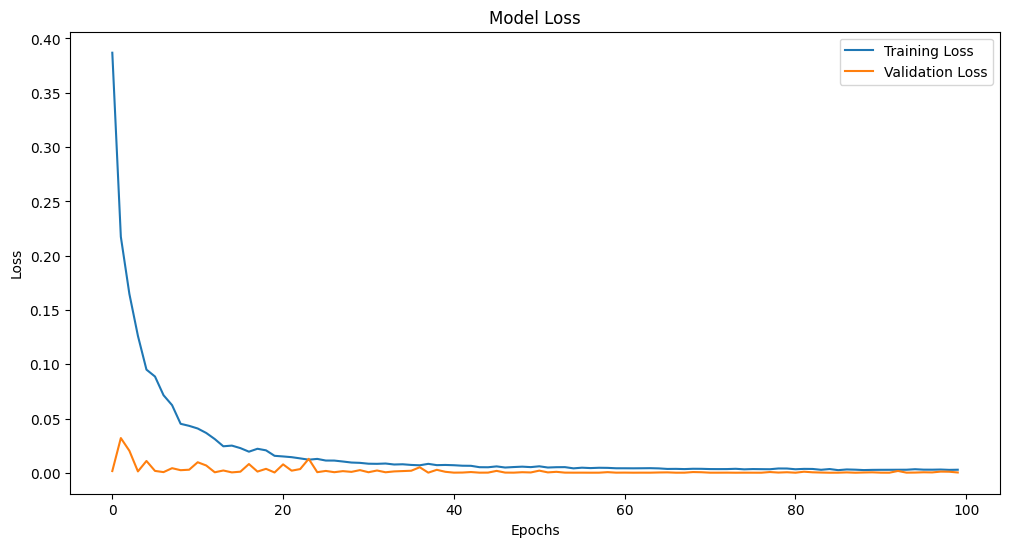

In [40]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
# Evaluate on validation data
val_loss = model.evaluate(X_val, y_val, verbose=0)  # verbose=0 to suppress output
print(f"Validation Loss: {val_loss}")

# If you want to calculate MAE separately, you can use sklearn.metrics:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_pred)
print(f"Validation MAE: {val_mae}")

Validation Loss: 0.0001451022835681215
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Validation MAE: 0.00906527474759203


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


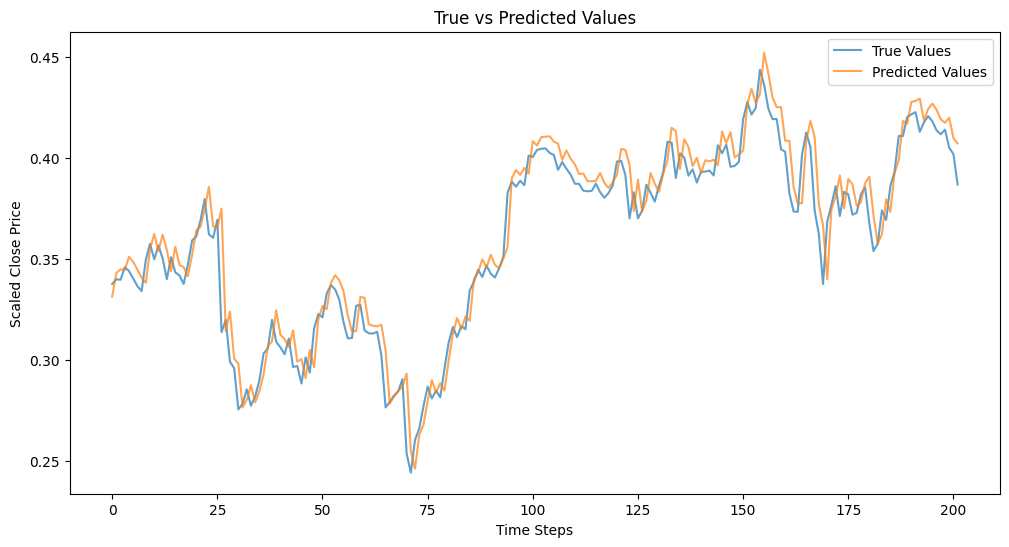

In [42]:
# Predict on validation data
y_pred = model.predict(X_val)

# Plot true vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='True Values', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


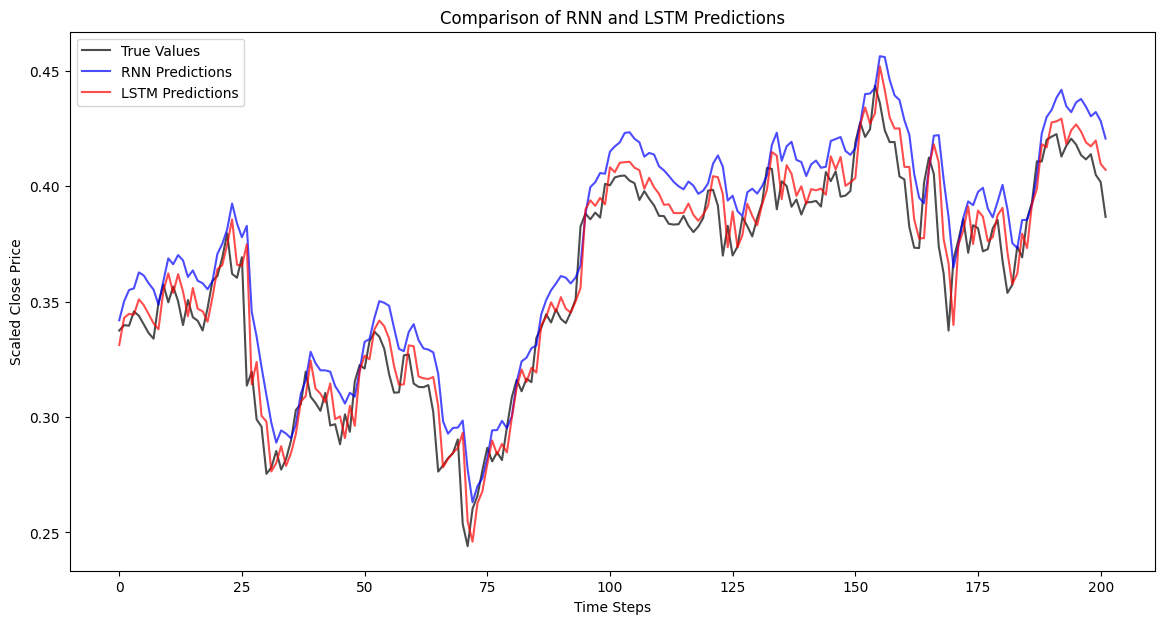

In [47]:
import matplotlib.pyplot as plt

# Predict using both RNN and LSTM models
y_pred_rnn = regressor.predict(X_val)  # Predictions from the RNN model, using 'regressor' instead of 'rnn_model'
y_pred_lstm = model.predict(X_val)  # Predictions from the LSTM model

# Plot the results
plt.figure(figsize=(14, 7))

# Plot true values
plt.plot(y_val, label='True Values', color='black', alpha=0.7)

# Plot RNN predictions
plt.plot(y_pred_rnn, label='RNN Predictions', color='blue', alpha=0.7)

# Plot LSTM predictions
plt.plot(y_pred_lstm, label='LSTM Predictions', color='red', alpha=0.7)

# Add titles and labels
plt.title('Comparison of RNN and LSTM Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.legend()

# Show the plot
plt.show()


LSTM looks greatly successful from the RNN.

Now we change hyperparemeter like "units, number of layers, epochs, batch_size, activation" in RNN

<a id="11"></a>
### LSTM Hyperparameter Tuning


In [48]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Import KerasRegressor from scikeras.wrappers instead
from scikeras.wrappers import KerasRegressor

# Define the model function for hyperparameter tuning
def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        LSTM(units, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

In [49]:
from sklearn.model_selection import GridSearchCV

# Wrap the model using KerasRegressor
# Pass create_model as a function to model
model = KerasRegressor(model=create_model, verbose=0)

# Define the grid of hyperparameters
# Prepend 'model__' to the parameters that need to be passed to create_model function
param_grid = {
    'model__units': [50, 100],                 # Number of units in the LSTM layer
    'model__dropout_rate': [0.2, 0.3, 0.5],   # Dropout rates
    'model__optimizer': ['adam', 'rmsprop'],  # Optimizers
    'batch_size': [16, 32],            # Batch sizes
    'epochs': [20, 30]                 # Number of epochs
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print(f"Best Parameters: {best_params}")

# Get the best score
best_score = -grid_result.best_score_  # Negative MSE
print(f"Best Validation MSE: {best_score:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Best Parameters: {'batch_size': 16, 'epochs': 30, 'model__dropout_rate': 0.3, 'model__optimizer': 'rmsprop', 'model__units': 100}
Best Validation MSE: 0.0015


In [53]:
# Train the final model with the best hyperparameters
final_model = create_model(
    units=best_params['model__units'],
    dropout_rate=best_params['model__dropout_rate'],
    optimizer=best_params['model__optimizer']
)

history = final_model.fit(
    X_train, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    validation_data=(X_val, y_val),
    verbose=1
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0400 - mean_absolute_error: 0.1118 - val_loss: 5.0656e-04 - val_mean_absolute_error: 0.0172
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0051 - mean_absolute_error: 0.0426 - val_loss: 0.0088 - val_mean_absolute_error: 0.0916
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0055 - mean_absolute_error: 0.0438 - val_loss: 8.8906e-04 - val_mean_absolute_error: 0.0240
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0040 - mean_absolute_error: 0.0370 - val_loss: 3.2643e-04 - val_mean_absolute_error: 0.0141
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0042 - mean_absolute_error: 0.0363 - val_loss: 3.4677e-04 - val_mean_absolute_error: 0.0148
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0035 - mean_absolute_error: 0.0334 - val_loss: 0.0029 - val_mean_absolute_error: 0.0515
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0029 - mean_absolute_error: 0

In [59]:
test_scaled = scaler.transform(test[['Close']])
timesteps = 10
X_test, y_test = [], []
for i in range(timesteps, len(test_scaled)):  # Iterate through test_scaled
    X_test.append(test_scaled[i-timesteps:i, 0])  # Assuming test_scaled is 2D
    y_test.append(test_scaled[i, 0])


X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) # Reshape for LSTM

# Evaluate the model on the test set
test_loss, test_mae = final_model.evaluate(X_test, y_test, verbose=1)  # Use X_test and y_test
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 3.8933e-04 - mean_absolute_error: 0.0154
Test Loss: 0.0004
Test MAE: 0.0154


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


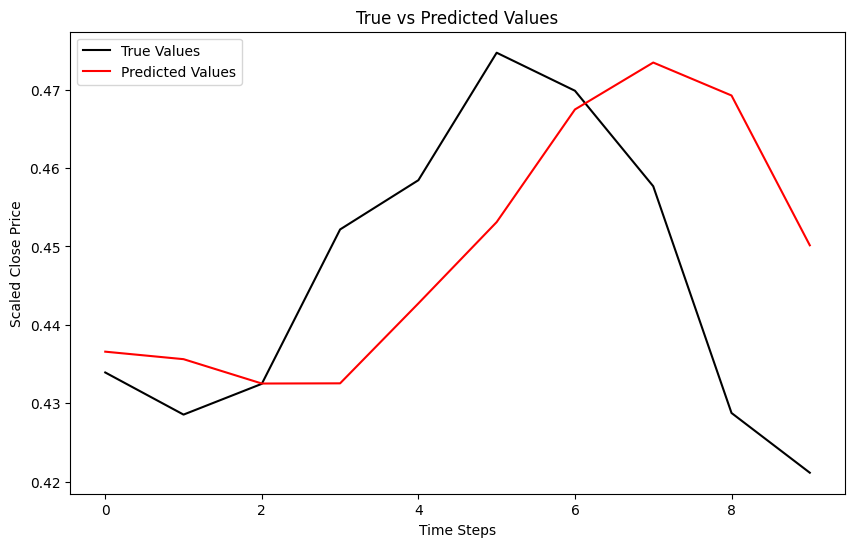

In [68]:

y_pred = final_model.predict(X_test)  # Predict values for the test set using final_model instead of model
y_pred = y_pred.flatten()  # Ensure the predicted values are in the correct shape

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='black', label='True Values')  # True test values
plt.plot(y_pred, color='red', label='Predicted Values')  # Predicted values
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()

### Conclusion
LSTM looks more successful than RNN in predict to values about time.